In [2]:
import os
import numpy as np
import pandas as pd
import tifffile
from tqdm.notebook import  tqdm,trange
#from preprocessing import preprocessing_v2 as pp
DATA_PATH = r'C:\Users\amityu\Gel_Drop_Data'
movie = 'eye_gel'
MOVIE_PATH = os.path.join(DATA_PATH, movie)
import matplotlib.pyplot as plt

In [13]:
files = sorted(os.listdir(os.path.join(MOVIE_PATH, 'tif')))
gel_list = []
for file in tqdm(files):
    if file.endswith('.tif'):
        img = tifffile.imread(os.path.join(MOVIE_PATH, 'tif', file))
        img = np.pad(img, pad_width=max(img.shape)//2, mode='constant', constant_values=0)
        gel_list.append(img)

gel = np.array(gel_list)

  0%|          | 0/972 [00:00<?, ?it/s]

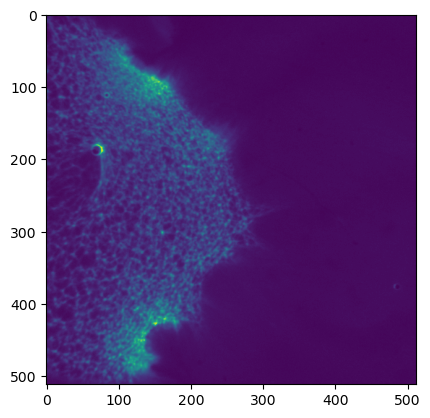

In [74]:
from tifffile import imread
image = imread(os.path.join(MOVIE_PATH, 'tif/20120913 exp3 x2_5 stream00972.tif'))
plt.imshow(image)
plt.show()

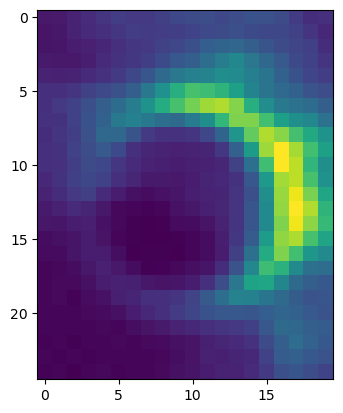

In [75]:
template = image[175:200, 60:80].copy()
plt.imshow(template)
plt.show()

In [76]:
from PIL import Image
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/image.tif'), image)
tifffile.imwrite(os.path.join(DATA_PATH, 'tmp/template.tif'), template)
pil_image = Image.fromarray(image)
pil_image.save(os.path.join(DATA_PATH, 'tmp/image.png'))
pil_template = Image.fromarray(template)
pil_template.save(os.path.join(DATA_PATH, 'tmp/template.png'))

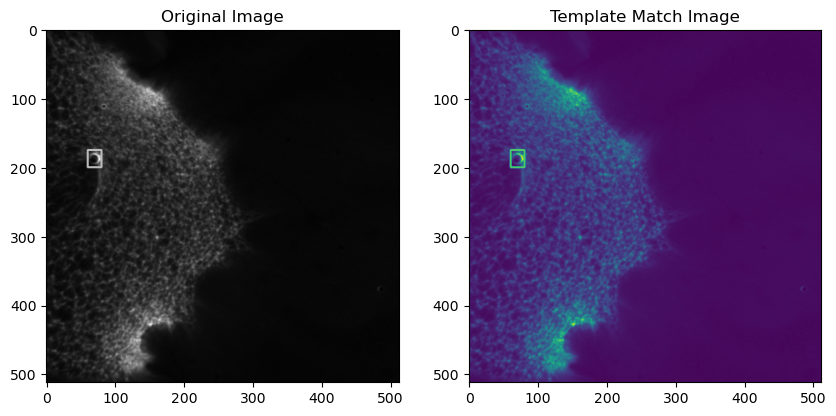

In [84]:
import cv2
# Load the template image
template_path = os.path.join(DATA_PATH, 'tmp/template.png')  # Provide the path to your template image
template = cv2.imread(template_path,cv2.IMREAD_ANYDEPTH)# cv2.IMREAD_GRAYSCALE)


def track_pattern_YA(_img, _template):
    assert _img.dtype ==np.uint16, "_img is not uint16" 
    assert _template.dtype ==np.uint16, "_template is not uint16" 

    # Convert to float32
    template_float32 = np.float32(_template)/65535
    # Perform template matching
    _image = (_img/2**16).astype(np.float32)
    result = cv2.matchTemplate(_image, template_float32, cv2.TM_CCOEFF_NORMED)
    
    # Find the location of the best match
    template_position = cv2.minMaxLoc(result)
    (min_val, max_val, min_loc, max_loc) = template_position 
    # Draw a rectangle around the matched region
    h, w = template_float32.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    #match_image = cv2.cvtColor(_image, cv2.COLOR_GRAY2BGR) 
    match_image = _image
    
    cv2.rectangle(match_image, top_left, bottom_right, 0.02, 2)
    return _image, match_image, template_position
_image, match_image,_ = track_pattern_YA(image, template)
# Display the original and matched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Template Match Image")
plt.imshow(match_image)
plt.show()


In [ ]:
files = sorted(os.listdir(os.path.join(MOVIE_PATH, 'tif')))
match_list = []
location_list = []
i_list = []
for i,file in tqdm(enumerate(files)):
    if file.endswith('.tif'):
        img = tifffile.imread(os.path.join(MOVIE_PATH, 'tif', file))
        _, match, mml = track_pattern_YA(img, template)
        match_list.append(match)
        location_list.append(mml[3])
        i_list.append(i)
match = np.array(match_list)

In [109]:
import pandas as pd
loc_df= pd.DataFrame({'FRAME':i_list, 'x': [x for (y,x) in location_list], 'y':[y for (y,x) in location_list]})
loc_df.to_csv(os.path.join(MOVIE_PATH ,'np/loc.csv'))

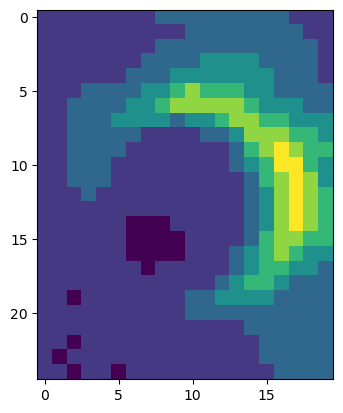

In [17]:
plt.imshow(template)